In [1]:
#!pip install nltk
#!conda install -c anaconda nltk

In [110]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords, wordnet
import string
from nltk.probability import FreqDist
import matplotlib.pyplot as plt
from nltk.tokenize import TweetTokenizer
import re
from nltk import pos_tag
from nltk.stem import WordNetLemmatizer
import string
from string import digits
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.dummy import DummyClassifier

In [94]:
# nltk.download('punkt')
# nltk.download('stopwords')
# nltk.download('averaged_perceptron_tagger')
# nltk.download('wordnet')
#nltk.download('tagsets')
#pip install wordcloud

[nltk_data] Downloading package tagsets to
[nltk_data]     C:\Users\mycha\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping help\tagsets.zip.


True

In [99]:
df = pd.read_csv('Data/Phase4_tweet_dataset.csv', encoding= 'unicode_escape')
df

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion
...,...,...,...
9088,Ipad everywhere. #SXSW {link},iPad,Positive emotion
9089,"Wave, buzz... RT @mention We interrupt your re...",NaN,No emotion toward brand or product
9090,"Google's Zeiger, a physician never reported po...",NaN,No emotion toward brand or product
9091,Some Verizon iPhone customers complained their...,NaN,No emotion toward brand or product


In [125]:
df['is_there_an_emotion_directed_at_a_brand_or_product']==['Positive emotion']

ValueError: ('Lengths must match to compare', (3291,), (1,))

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9093 entries, 0 to 9092
Data columns (total 3 columns):
 #   Column                                              Non-Null Count  Dtype 
---  ------                                              --------------  ----- 
 0   tweet_text                                          9092 non-null   object
 1   emotion_in_tweet_is_directed_at                     3291 non-null   object
 2   is_there_an_emotion_directed_at_a_brand_or_product  9093 non-null   object
dtypes: object(3)
memory usage: 213.2+ KB


In [101]:
df.dropna(inplace = True)

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3291 entries, 0 to 9088
Data columns (total 3 columns):
 #   Column                                              Non-Null Count  Dtype 
---  ------                                              --------------  ----- 
 0   tweet_text                                          3291 non-null   object
 1   emotion_in_tweet_is_directed_at                     3291 non-null   object
 2   is_there_an_emotion_directed_at_a_brand_or_product  3291 non-null   object
dtypes: object(3)
memory usage: 102.8+ KB


In [6]:
## Checking unique values
df['emotion_in_tweet_is_directed_at'].value_counts()

iPad                               946
Apple                              661
iPad or iPhone App                 470
Google                             430
iPhone                             297
Other Google product or service    293
Android App                         81
Android                             78
Other Apple product or service      35
Name: emotion_in_tweet_is_directed_at, dtype: int64

In [7]:
df['is_there_an_emotion_directed_at_a_brand_or_product'].value_counts()

Positive emotion                      2672
Negative emotion                       519
No emotion toward brand or product      91
I can't tell                             9
Name: is_there_an_emotion_directed_at_a_brand_or_product, dtype: int64

In [8]:
sw = stopwords.words('english')
sw

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [9]:
#Using the Tweet Tokenizer to tokenize tweets
tweet_tokenizer = TweetTokenizer(strip_handles=True, reduce_len=True, preserve_case=False)

In [10]:
#testing tokenizer -need to get rid of numerics, punctuation inside the preparer function
tweet_tokenizer.tokenize(df['tweet_text'][0])

['.',
 'i',
 'have',
 'a',
 '3g',
 'iphone',
 '.',
 'after',
 '3',
 'hrs',
 'tweeting',
 'at',
 '#rise_austin',
 ',',
 'it',
 'was',
 'dead',
 '!',
 'i',
 'need',
 'to',
 'upgrade',
 '.',
 'plugin',
 'stations',
 'at',
 '#sxsw',
 '.']

In [11]:
##Translate nltk POS to wordnet tags
def get_wordnet_pos(treebank_tag):
    '''
    Translate nltk POS to wordnet tags
    '''
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

In [12]:
sw.extend(["i'd","say", "i'm", "w", "@mention", "#sxswrt", "#ipad", "#apple", "u", "#sxsw", "sxsw"])

In [13]:
### need to remove numeric values 
def doc_preparer(doc, stop_words=sw):
    '''
    
    :param doc: a document from the satire corpus 
    :return: a document string with words which have been 
            lemmatized, 
            parsed for stopwords, 
            made lowercase,
            and stripped of punctuation and numbers.
    '''
    
    tweet_tokenizer = TweetTokenizer(strip_handles=True, reduce_len=True, preserve_case=False)
    doc = tweet_tokenizer.tokenize(doc)
    doc = [word for word in doc if word not in sw] #getting rid of stopwords
    doc = [word for word in doc if string.punctuation.find(word) == -1] #getting rid of punctuation
    doc = pos_tag(doc)
    doc = [(word[0], get_wordnet_pos(word[1])) for word in doc]
    lemmatizer = WordNetLemmatizer() #lemmatizing
    doc = [lemmatizer.lemmatize(word[0], word[1]) for word in doc] 
    doc = [re.sub(r"\d+", "", word) for word in doc] #getting rid of numeric values
#     doc = [word.encode('ascii') for word in doc] - trying to get rid of white square unicode symbol 
    return ' '.join(doc)

In [14]:
#adding '...' to punctuation string
string.punctuation += '...'
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~...'

In [15]:
doc_preparer(df['tweet_text'][0], sw)

'g iphone  hr tweet #rise_austin dead need upgrade plugin station'

In [16]:
df['clean_tweets'] = df['tweet_text'].apply(doc_preparer)

In [17]:
#body of text
corpus = ''
for i in df['clean_tweets'][:]:
    corpus += i

C:\Users\mycha\anaconda3\envs\learn-env\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 137 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\mycha\anaconda3\envs\learn-env\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 137 missing from current font.
  font.set_text(s, 0, flags=flags)


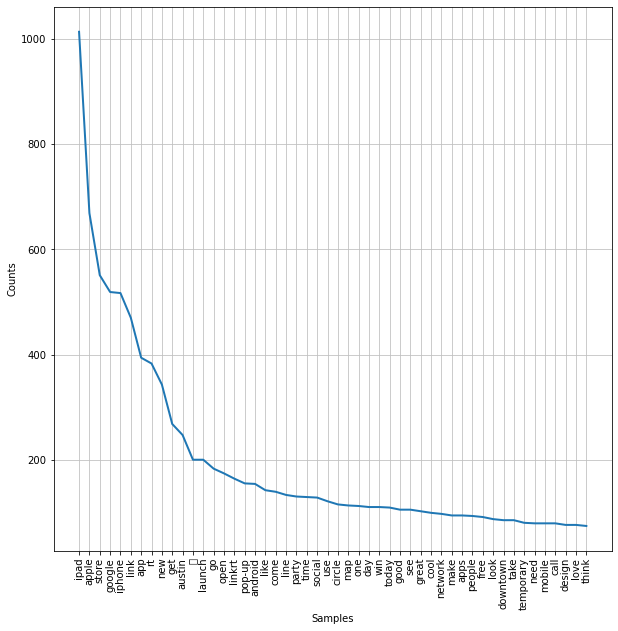

In [19]:
fdist = FreqDist(doc_preparer(corpus, stop_words=sw).split())
plt.figure(figsize=(10, 10))
fdist.plot(50);

In [20]:
X = df.drop(columns=['is_there_an_emotion_directed_at_a_brand_or_product', 'tweet_text'], axis =1)

In [21]:
y = df['is_there_an_emotion_directed_at_a_brand_or_product']

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    random_state=42,
                                                    test_size=0.25)

In [23]:
cv = CountVectorizer(input='content') #ngram_range=(3, 500))

X_train_vec = cv.fit_transform(X_train['clean_tweets'])
X_train_vec = pd.DataFrame.sparse.from_spmatrix(X_train_vec)
X_train_vec.columns = sorted(cv.vocabulary_)
X_train_vec.set_index(y_train.index, inplace=True)

In [24]:
X_test_vec = cv.transform(X_test['clean_tweets'])
X_test_vec = pd.DataFrame.sparse.from_spmatrix(X_test_vec)
X_test_vec.columns = sorted(cv.vocabulary_)
X_test_vec.set_index(y_test.index, inplace=True)


In [112]:
dc = DummyClassifier(strategy='most_frequent')

In [113]:
dc.fit(X_train_vec, y_train)

DummyClassifier(strategy='most_frequent')

In [114]:
y_pred_dummy = dc.predict(X_test_vec)

In [127]:
recall_score(y_test, y_pred_dummy, average='weighted')

0.8055893074119077

In [25]:
mnb = MultinomialNB()

mnb.fit(X_train_vec, y_train)

MultinomialNB()

In [26]:
y_pred = mnb.predict(X_test_vec)

In [27]:
accuracy_score(y_test, y_pred)

0.8371810449574727

In [51]:
f1 = f1_score(y_test, y_pred, average='weighted')
f1

0.8005171822911797

In [28]:
cm = confusion_matrix(y_test, y_pred)

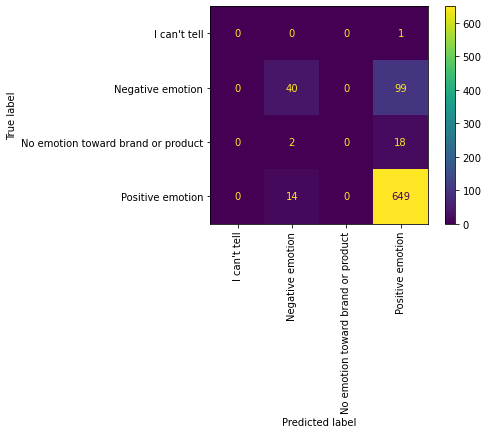

In [29]:
plot_confusion_matrix(mnb, X_test_vec, y_test, xticks_rotation='vertical');

In [30]:
sw.extend(["i'd","say", "I'm", "w", "@mention", "#sxswrt", "#ipad", "#apple", "u", "&#9647"])

In [177]:
'&#9647'

'&#9647'

In [52]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

In [85]:
rfc = RandomForestClassifier()

In [86]:
rfc_model = rfc.fit(X_train_vec, y_train)
rfc_model

RandomForestClassifier()

In [81]:
rfc_model.get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [87]:
rfc_grid = {'n_estimators':[100, 500, 1000],
            'criterion': ['gini', 'entropy', 'log_loss'],
            'min_samples_leaf': [1, 5, 10],
            'max_depth': [10, 30, 50, 100, None],
            'min_samples_split':[2, 5, 10],
            'max_features':['sqrt','log2','auto']}

In [88]:
rfc_gs = GridSearchCV(estimator=rfc_model, param_grid=rfc_grid, scoring='recall', cv=8, n_jobs=-2)

In [89]:
rfc_gs.fit(X_train_vec, y_train)

GridSearchCV(cv=8, estimator=RandomForestClassifier(), n_jobs=-2,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [10, 30, 50, 100, None],
                         'max_features': ['sqrt', 'log2', 'auto'],
                         'min_samples_leaf': [1, 5, 10],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 500, 1000]})

In [90]:
rfc_gs.best_params_

{'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 100}

In [91]:
rfc_model.get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [117]:
rfc_gs.best_score_

0.8488631109990332

In [106]:
rfc_gs.best_estimator_

RandomForestClassifier(min_samples_split=5)

In [120]:
rfc_gs.get_feature_names()

AttributeError: 'GridSearchCV' object has no attribute 'get_feature_names'

In [109]:
pd.DataFrame(rfc_gs.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,param_n_estimators,...,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,mean_test_score,std_test_score,rank_test_score
0,2.529830,0.088516,0.510909,0.018035,gini,10,sqrt,1,2,100,...,0.815534,0.812298,0.815534,0.814935,0.814935,0.821429,0.814935,0.815642,0.002403,339
1,4.409206,0.039909,0.574694,0.031873,gini,10,sqrt,1,2,500,...,0.812298,0.812298,0.815534,0.814935,0.814935,0.814935,0.814935,0.814425,0.001253,357
2,7.153367,0.206815,0.678572,0.070303,gini,10,sqrt,1,2,1000,...,0.812298,0.812298,0.815534,0.814935,0.814935,0.814935,0.814935,0.814425,0.001253,357
3,2.847147,0.276316,0.583655,0.062167,gini,10,sqrt,1,5,100,...,0.812298,0.818770,0.815534,0.814935,0.814935,0.818182,0.814935,0.816045,0.002163,333
4,5.986177,0.751044,0.847782,0.152619,gini,10,sqrt,1,5,500,...,0.812298,0.812298,0.815534,0.814935,0.814935,0.814935,0.814935,0.814425,0.001253,357
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1210,2.658008,0.087652,0.000000,0.000000,log_loss,None,auto,10,5,500,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,940
1211,3.316386,0.081672,0.000000,0.000000,log_loss,None,auto,10,5,1000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,939
1212,2.365534,0.130019,0.000000,0.000000,log_loss,None,auto,10,10,100,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,937
1213,2.670619,0.041427,0.000000,0.000000,log_loss,None,auto,10,10,500,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1085


In [119]:
mean_recall_score_rfc = pd.DataFrame(rfc_gs.cv_results_)['mean_test_score'].mean()
mean_recall_score_rfc

0.8189612225143509

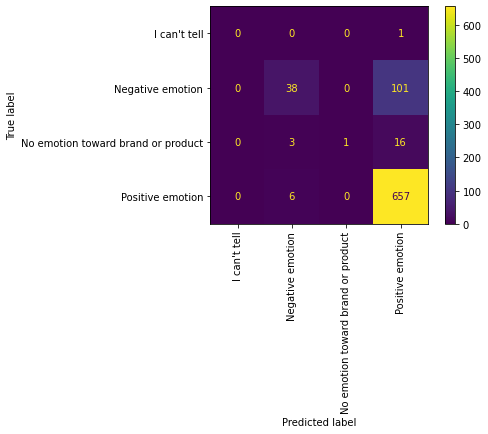

In [103]:
plot_confusion_matrix(rfc_gs, X_test_vec, y_test, xticks_rotation='vertical');

In [121]:
from wordcloud import Wordcloud

ModuleNotFoundError: No module named 'wordcloud'

In [122]:
pip install wordcloud